# Algoritmos de Classificação: Regressão Logística
## Pós-aula

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score)

from plotting import (multiple_histograms_plot, plot_confusion_matrix, plot_roc)
import joblib

In [3]:
sns.set_context("notebook", font_scale=1.5)

In [4]:
df = pd.read_csv('../data/bank_marketing.csv')

### Funções customizadas, criadas no notebook da aula

In [20]:
def predictions_hist(y_pred_proba, y_test, density=True):
    preds_df = pd.DataFrame(data=[y_pred_proba, y_test.astype(str)],
                            index=['Prediction', 'True Value']).T

    preds_df['Prediction'] = preds_df['Prediction'].astype(float)
    preds_df['True Value'] = preds_df['True Value'].astype(str)

    multiple_histograms_plot(data=preds_df, x='Prediction', hue='True Value',
                             bins=np.arange(0, 1.1, 0.025), density=density, probability_hist=True)

    return preds_df

In [23]:
def confusion_matrix_report(y_test, y_pred_proba, thres=0.5):
    y_pred_proba_customizado = y_pred_proba >= thres
    print(classification_report(y_test, y_pred_proba_customizado))
    plot_confusion_matrix(y_test_no_outliers, y_pred_proba_customizado)

## Preparando os dados

In [5]:
X = df.drop(columns=['month', 'subscribed'])
y = df['subscribed']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

## Tentando melhorar o modelo

### Tratamento de outliers

Vamos setar a duração máxima de uma call para 3000 segundos. O seja, se uma call exceder a duração máxima, vamos editar os valores de acordo.

In [9]:
df_no_outliers = df.copy()

In [10]:
outlier_candidates = df_no_outliers['duration_seconds'] > 3000
df_no_outliers[outlier_candidates]

,duration_seconds,duration_minutes,duration_hours,emp.var.rate,nr.employed,euribor3m,month,contact,loan,subscribed
2313,673200,11220.000000,187.000000,1.1,5191.0,4.856,may,1,0,False
4213,615600,10260.000000,171.000000,1.1,5191.0,4.858,may,1,0,False
6279,618800,10313.333333,171.888889,1.1,5191.0,4.857,may,1,0,True
7726,726200,12103.333333,201.722222,1.1,5191.0,4.864,may,1,0,True
12028,636600,10610.000000,176.833333,1.4,5228.1,4.955,jun,1,0,True
13819,728600,12143.333333,202.388889,1.4,5228.1,4.963,jul,2,0,True
19631,684400,11406.666667,190.111111,1.4,5228.1,4.968,aug,2,0,False
20995,664400,11073.333333,184.555556,1.4,5228.1,4.964,aug,2,1,False
22191,839800,13996.666667,233.277778,1.4,5228.1,4.963,aug,1,0,True
24002,650600,10843.333333,180.722222,-0.1,5195.8,5.045,oct,1,0,False


In [11]:
df_no_outliers.loc[outlier_candidates, 'duration_seconds'] = 3000
df_no_outliers.loc[outlier_candidates, 'duration_minutes'] = 3000 / 60
df_no_outliers.loc[outlier_candidates, 'duration_hours'] = 3000 / 60 / 60

In [12]:
df_no_outliers[outlier_candidates]

,duration_seconds,duration_minutes,duration_hours,emp.var.rate,nr.employed,euribor3m,month,contact,loan,subscribed
2313,3000,50.0,0.833333,1.1,5191.0,4.856,may,1,0,False
4213,3000,50.0,0.833333,1.1,5191.0,4.858,may,1,0,False
6279,3000,50.0,0.833333,1.1,5191.0,4.857,may,1,0,True
7726,3000,50.0,0.833333,1.1,5191.0,4.864,may,1,0,True
12028,3000,50.0,0.833333,1.4,5228.1,4.955,jun,1,0,True
13819,3000,50.0,0.833333,1.4,5228.1,4.963,jul,2,0,True
19631,3000,50.0,0.833333,1.4,5228.1,4.968,aug,2,0,False
20995,3000,50.0,0.833333,1.4,5228.1,4.964,aug,2,1,False
22191,3000,50.0,0.833333,1.4,5228.1,4.963,aug,1,0,True
24002,3000,50.0,0.833333,-0.1,5195.8,5.045,oct,1,0,False


In [13]:
X_no_outliers = df_no_outliers.drop(columns=['month', 'subscribed'])
y_no_outliers = df_no_outliers['subscribed']

(X_train_no_outliers, X_test_no_outliers, 
 y_train_no_outliers, y_test_no_outliers) = train_test_split(X_no_outliers, y_no_outliers, 
                                                             test_size=0.2, random_state=0)

In [16]:
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')
logreg.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_proba_no_outliers = logreg.predict_proba(X_test_no_outliers)[:, 1]

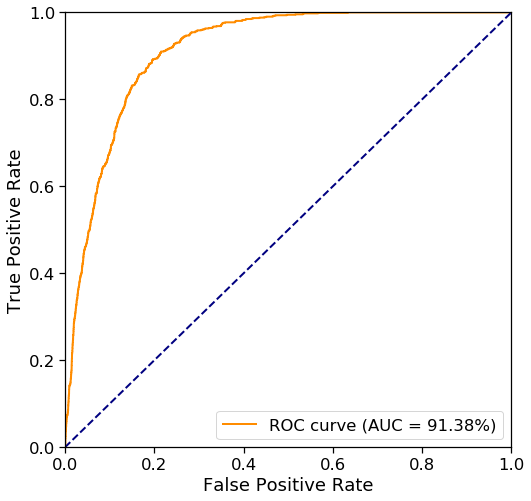

In [17]:
_ = plot_roc(y_test, y_pred_proba_no_outliers)

Podemos ver uma grande melhoria no AUC, de 74.54% para 91.38%.

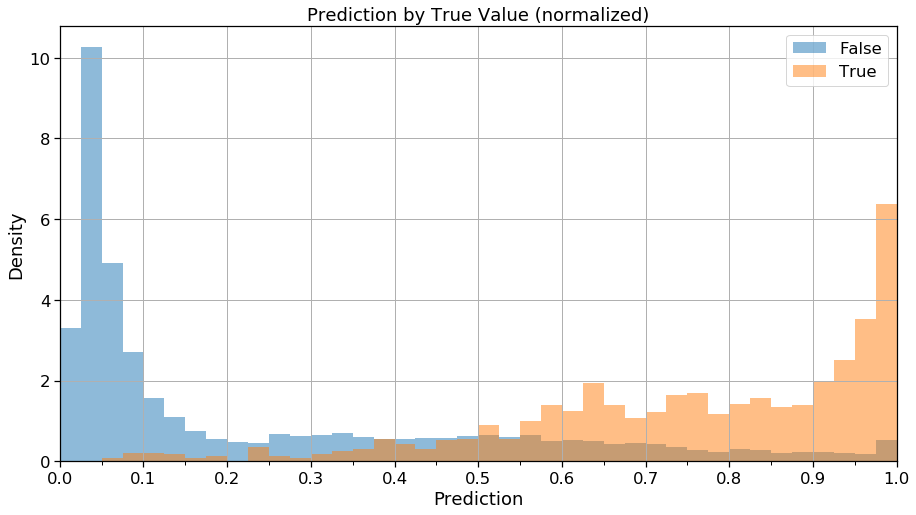

In [21]:
_ = predictions_hist(y_pred_proba_no_outliers, y_test_no_outliers)

Como o AUC já indicava, remover outliers ajuda bastante o modelo linear a conseguir melhor separar as classes.

Vamos experimentar com 2 pontos de corte diferentes: 57% e 74%:

              precision    recall  f1-score   support

       False       0.98      0.85      0.91      7315
        True       0.41      0.83      0.55       922

    accuracy                           0.85      8237
   macro avg       0.69      0.84      0.73      8237
weighted avg       0.91      0.85      0.87      8237



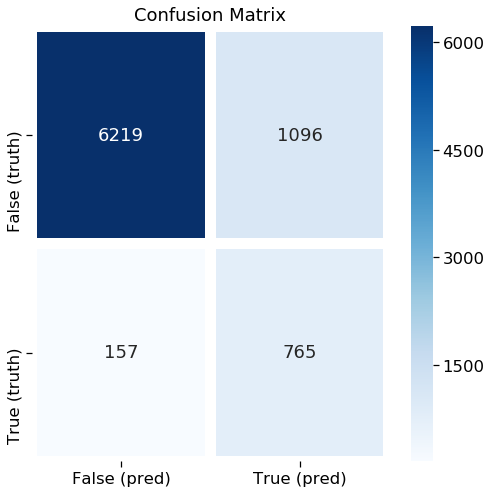

In [51]:
confusion_matrix_report(y_test_no_outliers, y_pred_proba_no_outliers, thres=0.57)

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      7315
        True       0.51      0.59      0.55       922

    accuracy                           0.89      8237
   macro avg       0.73      0.76      0.74      8237
weighted avg       0.90      0.89      0.89      8237



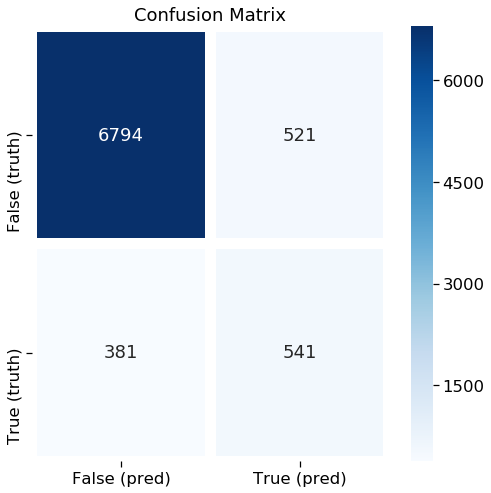

In [50]:
confusion_matrix_report(y_test_no_outliers, y_pred_proba_no_outliers, thres=0.74)

Podemos ver que aumentando o corte de 57% para 74%, conseguimos aumentar a precisão de 41% para 51%, porém com uma redução do recall de 83% para 59%.

### Padronização/normalização dos dados

In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_no_outliers)

X_scaled = pd.DataFrame(scaled_data, 
                        index=X_no_outliers.index,
                        columns=X_no_outliers.columns)

df_standardized = pd.concat([X_scaled, y_no_outliers],
                            axis='columns')

In [53]:
df_standardized.head()

,duration_seconds,duration_minutes,duration_hours,emp.var.rate,nr.employed,euribor3m,contact,loan,subscribed
0,0.011203,0.011203,0.011203,0.64807,0.331657,0.712437,-1.318238,-0.461759,False
1,-0.424722,-0.424722,-0.424722,0.64807,0.331657,0.712437,-1.318238,-0.461759,False
2,-0.125023,-0.125023,-0.125023,0.64807,0.331657,0.712437,-1.318238,-0.461759,False
3,-0.416937,-0.416937,-0.416937,0.64807,0.331657,0.712437,-1.318238,-0.461759,False
4,0.190244,0.190244,0.190244,0.64807,0.331657,0.712437,-1.318238,2.165634,False


In [54]:
(X_train_standardized, X_test_standardized, 
 y_train_standardized, y_test_standardized) = train_test_split(X_scaled, y_no_outliers, 
                                                               test_size=0.2, random_state=0)

In [55]:
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')
logreg.fit(X_train_standardized, y_train_standardized)
y_pred_proba_standardized = logreg.predict_proba(X_test_standardized)[:, 1]

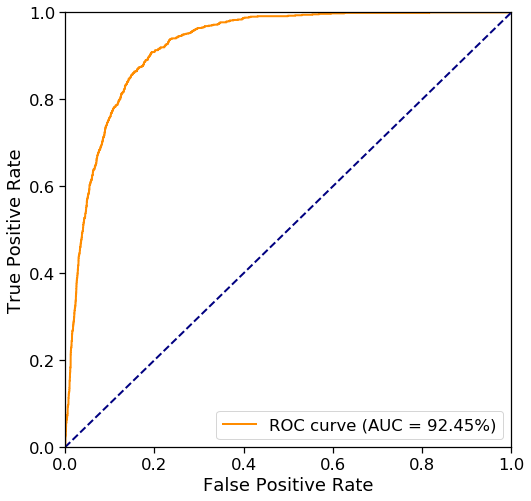

In [56]:
_ = plot_roc(y_test_no_outliers, y_pred_proba_standardized)

Podemos ver que, ao padronizar os dados, o AUC subiu de 91.38% para 92.45%.

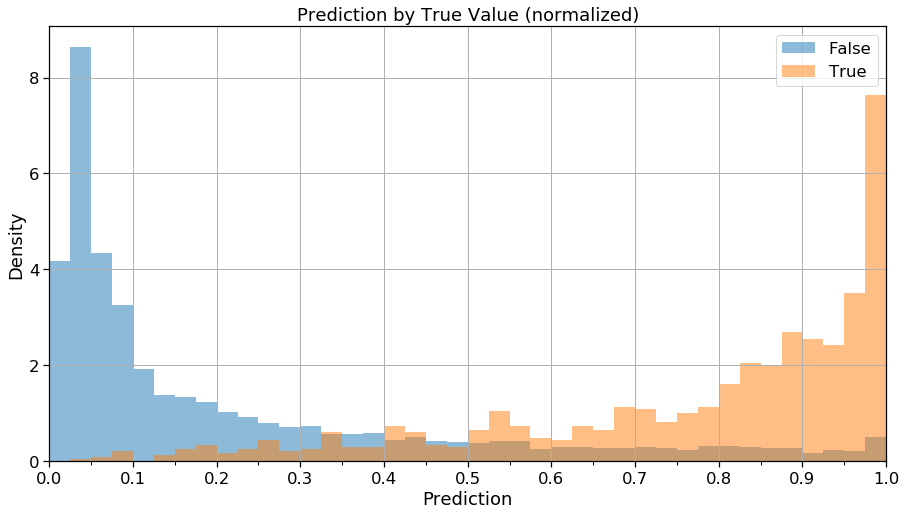

In [58]:
_ = predictions_hist(y_pred_proba_standardized, y_test_no_outliers)

Vamos experimentar com 2 pontos de cortes diferentes, dessa vez mais similares entre si: 66% e 70%.

              precision    recall  f1-score   support

       False       0.97      0.90      0.93      7315
        True       0.49      0.75      0.60       922

    accuracy                           0.89      8237
   macro avg       0.73      0.83      0.76      8237
weighted avg       0.91      0.89      0.90      8237



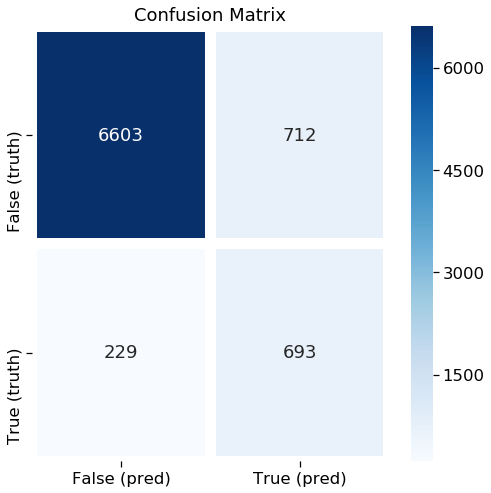

In [70]:
confusion_matrix_report(y_test_no_outliers, y_pred_proba_standardized, thres=0.66)

              precision    recall  f1-score   support

       False       0.96      0.91      0.94      7315
        True       0.51      0.71      0.60       922

    accuracy                           0.89      8237
   macro avg       0.74      0.81      0.77      8237
weighted avg       0.91      0.89      0.90      8237



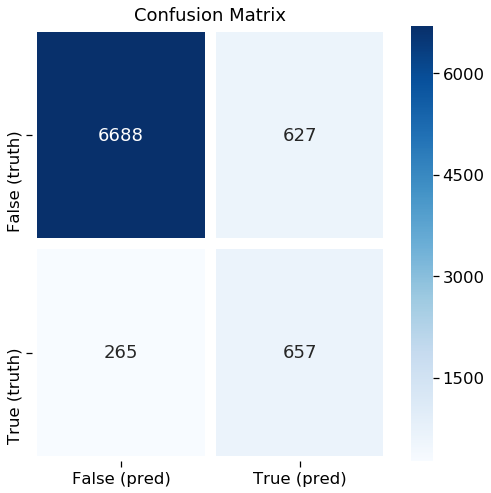

In [71]:
confusion_matrix_report(y_test_no_outliers, y_pred_proba_standardized, thres=0.7)

Subindo o corte de 66% para 70%, aumentamos a precisão de 49% para 51%, com uma redução no recall de 75% para 71%.

## Salvando o modelo

Vamos salvar o modelo para conseguirmos carregá-lo em análises futuras pós-aula. Para detalhes, veja a documentação do scikit-learn: [Model Persistence](http://scikit-learn.org/stable/modules/model_persistence.html).

In [72]:
_ = joblib.dump(logreg, '../models/logreg.pkl')

Vamos também salvar o dataset transformado, assim como foi utilizado pelo modelo final. Para facilitar a interpretação do modelo, salvaremos também uma versão para "display", que é sua versão antes da padronização dos dados.

In [73]:
df_standardized.to_csv('../data/bank_marketing_processed.csv', index=False)

In [74]:
(df_no_outliers.drop(columns='month')
               .to_csv('../data/bank_marketing_display.csv', index=False))